In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/8/data

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/8/data


In [0]:
import numpy as np
from tensorflow.keras.datasets import imdb
max_features=10000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
print(type(x_train));print(type(x_test))
print(type(y_train));print(type(y_test))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

17465344/17464789 [==============================] - 1s 0us/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25000,)
(25000,)
(25000,)


In [0]:
print(x_train[0])
print(len(x_train[0]))
print('##################################################################################')
wordindex=imdb.get_word_index() # word index를 부름.
print(len(wordindex)) # 88584개의 word중 위에서 max_features가 10000이었으므로, 9999개의 단어를 부른다는 뜻.
print(type(wordindex))
for key,value in wordindex.items():
    if value==11:
        print(key)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
########################################################

In [0]:
exchindex=dict([(value,key) for (key,value) in wordindex.items()])

In [0]:
from tensorflow.keras.preprocessing import sequence
lenmax=700
input_train=sequence.pad_sequences(x_train,maxlen=lenmax)
input_test=sequence.pad_sequences(x_test,maxlen=lenmax)
# 숫자를 채울때는 앞에서부터 채움 / 지울때는 앞에서부터 지움. 이는 물론 옵션으로 조절할 수 있음. padding='pre' or 'post'
# 이 값은 time step에 해당할 길이를 정하는거임.

print(input_train.shape)
print(input_test.shape)

(25000, 700)
(25000, 700)


In [0]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1,l2

m_lstm=Sequential()
m_lstm.add(Embedding(max_features,32))
m_lstm.add(LSTM(16, dropout=0.5,kernel_regularizer=l2(0.1)))
m_lstm.add(Dense(1,activation='sigmoid'))
m_lstm.summary()
m_lstm.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=m_lstm.fit(input_train,y_train,epochs=8,batch_size=128, validation_split=0.2)
test_loss_acc=m_lstm.evaluate(input_test,y_test)
print(test_loss_acc)

# 모수가 4배임을 확인하자.

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 323,153
Trainable params: 323,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
157/157 [==============================] - 6s 39ms/step - loss: 2.1910 - acc: 0.6625 - val_loss: 0.7932 - val_acc: 0.7978
Epoch 2/8
157/157 [==============================] - 6s 36ms/step - loss: 0.5293 - acc: 0.8292 - val_loss: 0.4445 - val_acc: 0.8208
Epoch 3/8
157/157 [==============================] - 6s 37ms/step - loss: 0.3758 - acc: 0.8663 - val_loss: 0.3503

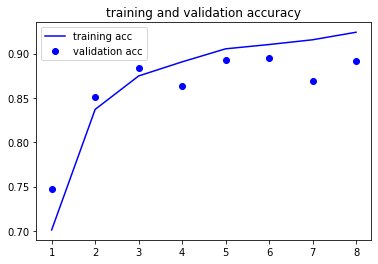

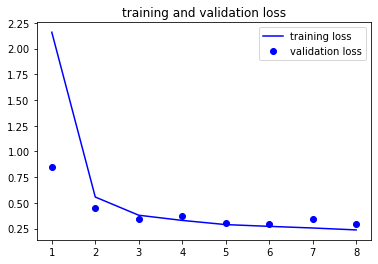

In [0]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.models import Sequential
m_gru=Sequential()
m_gru.add(Embedding(max_features,32))
m_gru.add(GRU(16, dropout=0.5,kernel_regularizer=l2(0.1)))
m_gru.add(Dense(1,activation='sigmoid'))
m_gru.summary()
m_gru.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=m_gru.fit(input_train,y_train,epochs=7,batch_size=128, validation_split=0.2)
test_loss_acc=m_gru.evaluate(input_test,y_test)
print(test_loss_acc)

# 모수가 3배임을 확인하자.

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
gru_19 (GRU)                 (None, 16)                2400      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 17        
Total params: 322,417
Trainable params: 322,417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
157/157 [==============================] - 6s 39ms/step - loss: 2.3006 - acc: 0.5969 - val_loss: 0.9358 - val_acc: 0.7164
Epoch 2/7
157/157 [==============================] - 6s 38ms/step - loss: 0.5708 - acc: 0.7929 - val_loss: 0.4766 - val_acc: 0.8020
Epoch 3/7
157/157 [==============================] - 6s 37ms/step - loss: 0.4012 - acc: 0.8489 - val_loss: 0.3663

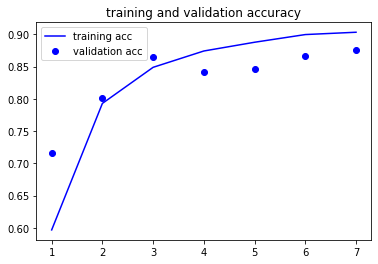

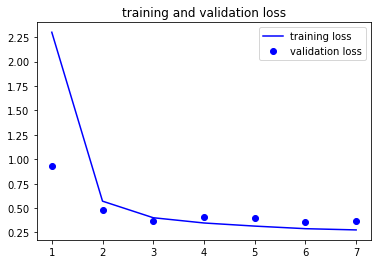

In [0]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()